In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.functional as F 
import torch.nn as nn 
import torch 

# All skl imports go here
from sklearn import tree   # Decision Trees
from sklearn import svm    # svm
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import metrics

import sklearn as skl

# Data Loading

In [12]:
# Load all data
train_data = pd.read_csv("training_labse.csv")
test_data = pd.read_csv("test_labse.csv")
validation_data = pd.read_csv("validation_labse.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = [x for x in train_data if x.startswith("_e")]
LABEL_COLUMN = "label"

X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

In [7]:
# Perform pre-processing PCA on the training set
TARGET_EXPLAINED_VARIANCE = 0.95 

def perform_pca(dataset):
    pca = PCA(n_components= TARGET_EXPLAINED_VARIANCE)

    # Need to standardize the data frirst
    standardized = (dataset - dataset.mean(axis=0)) / dataset.std(axis = 0)

    pca.fit(X=standardized)
    dataset_reduced = pca.fit_transform(X=standardized)

    return pca, dataset_reduced



In [8]:

pca_train, X_train_reduced = perform_pca(X_train)
pca_tran_val, X_train_val_reduced = perform_pca(X_train_val)

# K-Folds Cross Validation

In [26]:

def k_folds_x_val(model): 
    cumulative_accuracy = 0
    cumulative_f1 = 0

    k_folds = KFold(n_splits=10)

    for i, (train_index, test_index) in enumerate(k_folds.split(X_train_val_reduced, Y_train_val)):
        model.fit(X_train_val_reduced[train_index], Y_train_val.iloc[train_index])
        
        Y_pred = model.predict(X_train_val_reduced[test_index])
        Y_true = Y_train_val.iloc[test_index]
        # Add all metrics here

        cumulative_accuracy += metrics.accuracy_score(Y_true, Y_pred)
        cumulativve_f1 += metrics.f1_score(Y_true, Y_pred)

    folds = k_folds.get_n_splits()
    print(f"Performed {folds}-fold cross validation")
    print(f"Average accuracy {cumulative_accuracy / folds}")
    print(f"Average F1-score {cumulative_f1 / folds}")

# Decision Trees

In [22]:
decision_tree_model = tree.DecisionTreeClassifier(
    criterion='entropy', 
    splitter = 'best',
    max_depth = 5
)

In [27]:
k_folds_x_val(decision_tree_model)

Fold 0:
Accuracy: 0.48833333333333334
Fold 1:


KeyboardInterrupt: 

[Text(0.5, 0.9166666666666666, 'x[323] <= -0.039\nentropy = 2.272\nsamples = 16000\nvalue = [4666, 5362, 1304, 2159, 1937, 572]'),
 Text(0.25, 0.75, 'x[613] <= -0.048\nentropy = 2.274\nsamples = 10036\nvalue = [3583, 2370, 570, 1612, 1512, 389]'),
 Text(0.125, 0.5833333333333334, 'x[151] <= -0.033\nentropy = 2.214\nsamples = 5472\nvalue = [2050, 897, 228, 1111, 1035, 151]'),
 Text(0.0625, 0.4166666666666667, 'x[332] <= 0.012\nentropy = 2.103\nsamples = 2941\nvalue = [1156, 310, 65, 624, 706, 80]'),
 Text(0.03125, 0.25, 'x[190] <= -0.004\nentropy = 2.174\nsamples = 1531\nvalue = [483, 210, 43, 283, 472, 40]'),
 Text(0.015625, 0.08333333333333333, 'entropy = 2.112\nsamples = 654\nvalue = [160, 112, 21, 70, 272, 19]'),
 Text(0.046875, 0.08333333333333333, 'entropy = 2.129\nsamples = 877\nvalue = [323, 98, 22, 213, 200, 21]'),
 Text(0.09375, 0.25, 'x[0] <= -0.039\nentropy = 1.945\nsamples = 1410\nvalue = [673, 100, 22, 341, 234, 40]'),
 Text(0.078125, 0.08333333333333333, 'entropy = 1.297\

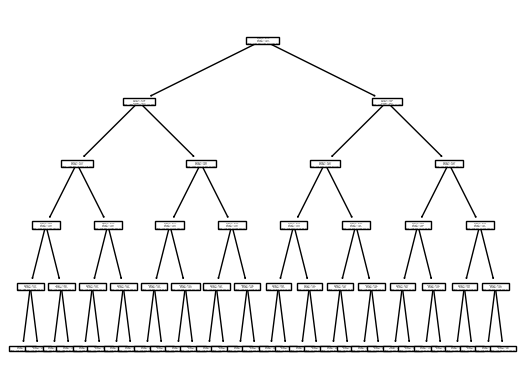

In [ ]:
decision_tree_model.fit(X_train_reduced, Y_train)
tree.plot_tree(decision_tree_model)

# SVMs

In [45]:
svm_classifier = svm.SVC(kernel='sigmoid') # 'precomputed', 'linear', 'poly', 'sigmoid', 'rbf'

#Train the model using the training sets
svm_classifier.fit(X_train_reduced, Y_train)

#Predict the response for test dataset
Y_pred = svm_classifier.predict(X_test)

In [46]:

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
# Linear = 0.64
# rbf = 0.659
# poly = 0.662
# sigmoid = 0.6235


Accuracy: 0.6235


# MLP

# RNN

# Encoder-Only Transformer

# Test

In [ ]:
model_to_test = decision_tree_model

In [ ]:
#TODO: Add stuff for running the test set on the model